In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
cd /content/gdrive/MyDrive/Code/

/content/gdrive/MyDrive/Code


https://datascienceplus.com/evaluation-of-topic-modeling-topic-coherence/

In [3]:
# !pip install -q hazm
# !pip install -q parsivar
# !pip install -q pyLDAvis
!pip install -q pyLDAvis==3.2.2

In [4]:
import pandas as pd
import numpy as np
from string import punctuation
from collections import Counter
import re
from nltk.tokenize import regexp_tokenize , word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import spacy

import codecs
import os
import random

import string
# from hazm import Lemmatizer , Normalizer
# from hazm import Normalizer as hazm_norm
from tqdm import tqdm_notebook
# from parsivar import Tokenizer , FindStems


import sklearn as sk
import nltk
import matplotlib.pyplot as plt
import re
import seaborn as sns
from nltk.tokenize import regexp_tokenize , word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import tqdm


# from hazm import Normalizer, Lemmatizer, WordTokenizer, InformalNormalizer

In [17]:
# p_df = pd.read_json("virgool_removed_word_112_4.json" )
# p_df.head(3)

import pandas as pd
df = pd.read_csv('drug_dataset.csv')
df = pd.DataFrame(df)
df.head(3)

##Preprocess and create dictionary

In [28]:
import nltk
nltk.download('stopwords') 
nltk.download('wordnet')


import nltk
nltk.download('wordnet')

import nltk
nltk.download('punkt')

from nltk.corpus import stopwords
stop = stopwords.words('english')


from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


import pandas as pd
from nltk.stem.snowball import SnowballStemmer
# Use English stemmer.
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


###Test

In [33]:
df.dropna(subset = ["text"], inplace=True)
from numpy import array
from nltk.tokenize import RegexpTokenizer
docs = array(df['text'])
# docs[6894]
tokenizer = RegexpTokenizer(r'\w+')
docs[0] = docs[0].lower()  # Convert to lowercase.
docs[0] = tokenizer.tokenize(docs[0])
docs[0] = [doc  for doc in docs[0] if len(doc) > 2]

stop = stopwords.words('english')
custom_stop_word_list = ['whi','may','should','must']
stop = custom_stop_word_list + stop

# data = df.dropna(subset=['text2'])
docs[0] = [token for token in docs[0] if token not in stop]

# docs[0] = [lemmatizer.lemmatize(token) for token in docs[0]]
docs[0] = [stemmer.stem(token) for token in docs[0]]



##Preeprocess And Dictionary

In [35]:
# Import required packages
import numpy as np
import logging
import pyLDAvis.gensim
import json
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

# Import dataset
# p_df = pd.read_csv('C:/Users/kamal/Desktop/R project/Reviews.csv')
# Create sample of 10,000 reviews
p_df = df.sample(n = 10000)
# Convert to array
docs =array(df['text'])
# Define function for tokenize and lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


def docs_preprocessor(docs):
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(docs)):
        # print(idx)
        docs[idx] = docs[idx].lower()  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

    # Remove numbers, but not words that contain numbers.
    # docs = [[token for token in doc if not token.isdigit()] for doc in docs]
    
    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 2] for doc in docs]

    stop = stopwords.words('english')
    custom_stop_word_list = ['whi','may','should','must']
    stop = custom_stop_word_list + stop

    # data = df.dropna(subset=['text2'])
    docs = [[token for token in doc if token not in stop] for doc in docs]
    # Lemmatize all words in documents.
    # lemmatizer = WordNetLemmatizer()
    docs = [[stemmer.stem(token) for token in doc] for doc in docs]
  
    return docs
# Perform function on our document
docs = docs_preprocessor(docs)
#Create Biagram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in [docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    # for token in [docs[idx]]:
    #     if '_' in token:
    #         # Token is a bigram, add to document.
    #         docs[idx].append(token)
#Remove rare & common tokens 
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=10, no_above=0.2)
#Create dictionary and corpus required for Topic Modeling
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
print(corpus[:1])

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


Number of unique tokens: 3927
Number of documents: 17741
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 3), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]]


#Build LDA Model

##Hyperparameter Tuning 
    
     

1.   Number of Topics (K)
2.   Dirichlet hyperparameter alpha: Document-Topic    Density
3.   Dirichlet hyperparameter beta: Word-Topic Density 


    

In [36]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

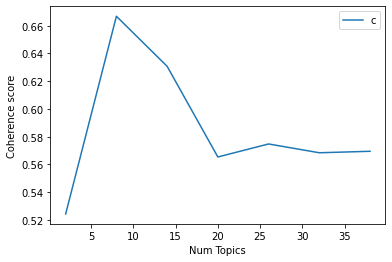

In [37]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary,
                                                        corpus=corpus, texts=docs,
                                                        start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [39]:
# Set parameters.
num_topics = 7
chunksize = 500 
passes = 20 
iterations = 200
eval_every = 1  

# Make a index to word dictionary.
temp = dictionary[0]  # only to "load" the dictionary.
id2word = dictionary.id2token

lda_model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)
# Print the Keyword in the 5 topics
print(lda_model.print_topics())

[(0, '0.032*"miss" + 0.031*"day" + 0.025*"tablet" + 0.025*"direct" + 0.022*"prescrib" + 0.019*"usual" + 0.017*"one" + 0.017*"continu" + 0.016*"come" + 0.015*"taken"'), (1, '0.036*"keep" + 0.036*"list" + 0.034*"case" + 0.025*"overdos" + 0.021*"product" + 0.020*"medicin" + 0.019*"visit" + 0.019*"counter" + 0.019*"dietari" + 0.018*"appoint"'), (2, '0.050*"children" + 0.046*"contain" + 0.030*"dispos" + 0.030*"back" + 0.029*"program" + 0.029*"reach" + 0.020*"safe" + 0.020*"keep" + 0.020*"medicin" + 0.019*"http"'), (3, '0.021*"treat" + 0.019*"inject" + 0.017*"blood" + 0.015*"infect" + 0.014*"bodi" + 0.014*"treatment" + 0.012*"cancer" + 0.012*"pain" + 0.011*"work" + 0.011*"risk"'), (4, '0.025*"pregnant" + 0.018*"becom" + 0.016*"plan" + 0.012*"ingredi" + 0.012*"product" + 0.011*"ever" + 0.009*"contain" + 0.009*"know" + 0.009*"phenylephrin" + 0.009*"sure"'), (5, '0.058*"side" + 0.036*"experi" + 0.031*"fda" + 0.031*"serious" + 0.028*"report" + 0.027*"medwatch" + 0.019*"sever" + 0.017*"drug" + 0.

##Model Evaluaition

###Using c_v Measure

In [40]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.6555142322985263


###Using UMass Measure

In [41]:
# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -1.136885561389734


#Visualize the topics-keywords

In [42]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.178692 -0.105878       1        1  21.702818
3     -0.202604  0.015213       2        1  19.914740
2      0.397794  0.090935       3        1  14.380188
0     -0.071210  0.160355       4        1  13.173723
5     -0.046697  0.069463       5        1  11.760657
1      0.097419 -0.389923       6        1   9.721619
6      0.003991  0.159835       7        1   9.346257, topic_info=         Term         Freq        Total Category  logprob  loglift
129      side  8004.000000  8004.000000  Default  30.0000  30.0000
497  children  7625.000000  7625.000000  Default  29.0000  29.0000
502   contain  8880.000000  8880.000000  Default  28.0000  28.0000
274      keep  6105.000000  6105.000000  Default  27.0000  27.0000
140      miss  3825.000000  3825.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
131      sure   548.073084  2883.973033   Topic7  -5.0561   0.7097
497  children   608.148202  7625.264547   Topic7  -4.9521  -0.1586
214     treat   561.924570  4559.122821   Topic7  -5.0311   0.2767
321      risk   532.980649  3011.058435   Topic7  -5.0840   0.6386
44       drug   531.320400  3110.529117   Topic7  -5.0871   0.6030

[459 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
146       5  0.999927     1088
253       6  0.999853     1222
254       6  0.999853      222
147       5  0.999927      332
148       5  0.530215      800
...     ...       ...      ...
29        2  0.984114     work
29        4  0.015675     work
277       6  1.000100  written
538       3  0.966757    young
538       7  0.033190    young

[765 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 3, 1, 6, 2, 7])